In [1]:
import numpy as np

In [244]:
# Stirling numbers of second kind
S = [[0 for i in range(10001)] for j in range(10001)]

# Combinations
C = [[0 for i in range(10001)] for j in range(10001)]

In [245]:
from scipy.special import factorial
from decimal import Decimal
import decimal
import math

def stirling(n,k,S):
    if S[n][k] > 0: return S[n][k]
    if k>n or k==0 or n==0: return 0
    if k==1 or k==n:
        S[n][k]=1
    else:
        S[n][k] = Decimal(stirling(n-1,k-1,S) + k*stirling(n-1,k,S))
    return S[n][k]

def combs(n,k,C,S):
    if C[n][k] > 0: return C[n][k]
    if k>n or k==0 or n==0: return 0
    c = Decimal(math.factorial(n)) / Decimal(math.factorial(n-k))
    C[n][k] = Decimal(c*stirling(n,k,S))
    return C[n][k]

def H(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(C[n][k] * Decimal((z**k)))
    return h

# Denominator in Expected no. of colors
def H_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal(k * C[n][k] * Decimal((z**k)))
    return h

# Denominator in Expected no. of colors squared
def H_t_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += Decimal((k**2) * C[n][k] * Decimal((z**k)))
    return h

def E_cols(n,z,C):
    return Decimal(H_t(n,z,C)/H(n,z,C))

def Var_cols(n,z,C):
    EX_2 = Decimal(H_t_t(n,z,C)/H(n,z,C))
    v = Decimal(EX_2 - (E_cols(n,z,C)**2))
    if v < 0:
        # print("Negative variance in",n,z,C)
        v = 0
    return v

def std_cols(n,z,C):
    return float(Var_cols(n,z,C))**(0.5)

In [248]:
for i in range(2501):
    if i%100==0: print(i)
    for j in range(2501):
        stirling(i,j,S)
        combs(i,j,C,S)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500


In [201]:
print("C(4,2):", C[4][2]) #84
print("C(4,.):", C[4][:10])
print ("sum of C(4,.):", sum(C[4]))
print ("H(4,1):", H(4,1,C))
print ("H_t(4,1):", H_t(4,1,C))
print ("H_t_t(4,1):", H_t_t(4,1,C))
print ("E_cols(4,1):", E_cols(4,1,C))
print ("Var_cols(4,1):", Var_cols(4,1,C))
print ("std_cols(4,1):", std_cols(4,1,C))

C(4,2): 84
C(4,.): [0, 4, 84, 144, 24, 0, 0, 0, 0, 0]
sum of C(4,.): 256
H(4,1): 256
H_t(4,1): 700
H_t_t(4,1): 2020
E_cols(4,1): 2.734375
Var_cols(4,1): 0.413818359375
std_cols(4,1): 0.6432871515699656


In [238]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_expected_colors (N):
    max_gamma = 100
    z = [np.e**(-gamma) for gamma in range(max_gamma)]
    print(z)
    y = [E_cols(N,zz,C) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.plot(range(max_gamma), y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_std_colors (N):
    max_gamma = int(N*1.2)
    gammas = range(max_gamma)
    z = [Decimal(np.e)**(-gamma) for gamma in gammas]
    y = [std_cols(N,zz,C) for zz in z]
    peaks, _ = find_peaks(y, height=0.1)
    print(N, peaks)
    pk_gammas = np.array([gammas[pk] for pk in peaks])
    print(pk_gammas/pk_gammas[-1])
    print()
    f = plt.figure(figsize=(18, 5))
    plt.plot(gammas, y)
    plt.plot(peaks, [y[pk] for pk in peaks], "|", c="red", ms=20)
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Std. num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/std_aprox_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()
    
def plot_avg_std_colors (N):
    max_gamma = 100
    gammas = np.linspace(0, max_gamma, num=100)
    z = [np.e**(-gamma) for gamma in gammas]
    y = [E_cols(N,zz,C) for zz in z]
    yerr = [np.real(std_cols(N,zz,C)) for zz in z]
    f = plt.figure(figsize=(18, 5))
    plt.errorbar(gammas, y, yerr=yerr, marker='o', color='black', capsize=3)
    plt.xlabel("Gamma (g)", fontsize=20) 
    plt.ylabel("Expected num. colors", fontsize=20)
    plt.title(str(N) + " total sites / colors", fontsize=20)
    plt.savefig("Expected_no_colors/avg_std_(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()

16 [13]
[1.]



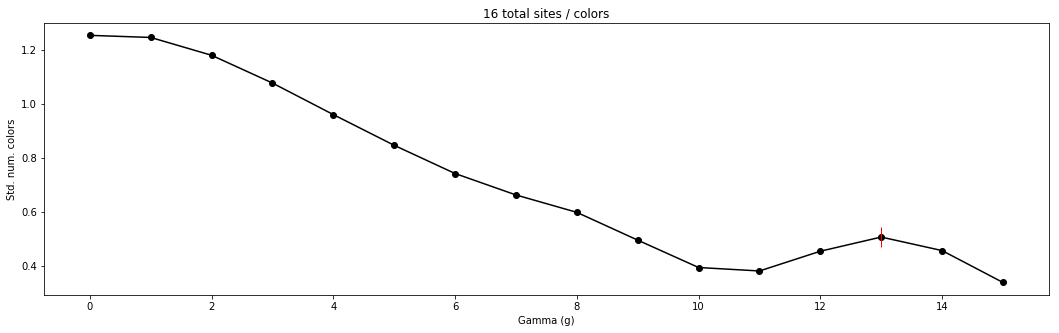

25 [12 20]
[0.6 1. ]



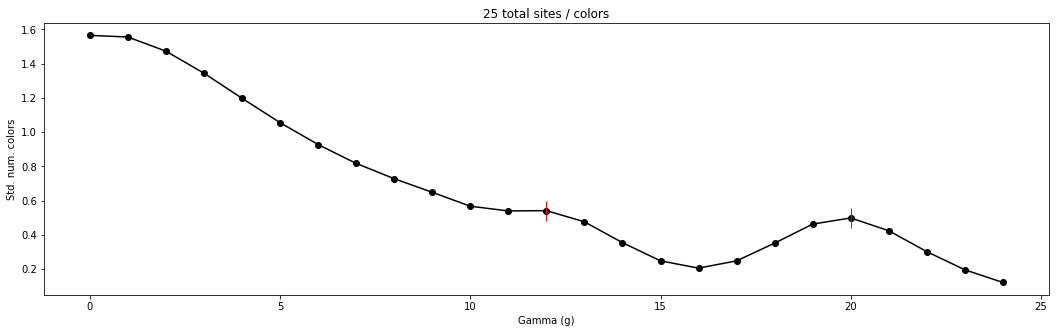

36 [17 28]
[0.60714286 1.        ]



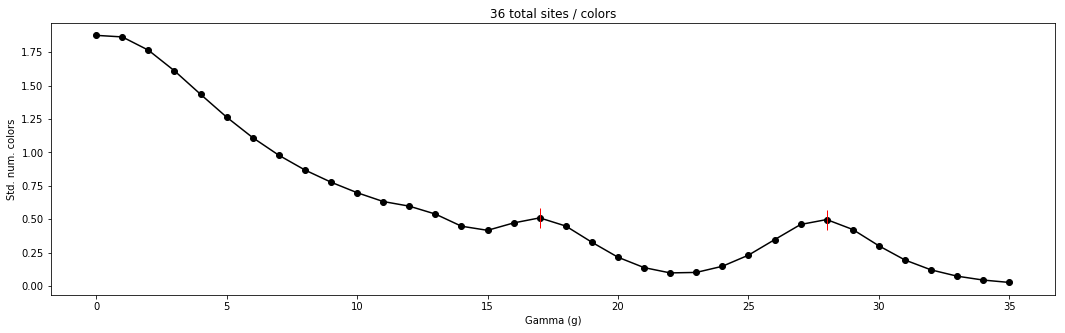

49 [16 23 37]
[0.43243243 0.62162162 1.        ]



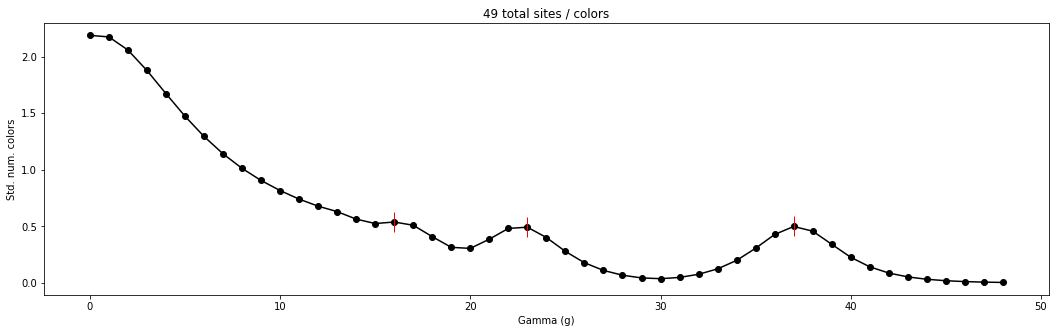

64 [21 29 48]
[0.4375     0.60416667 1.        ]



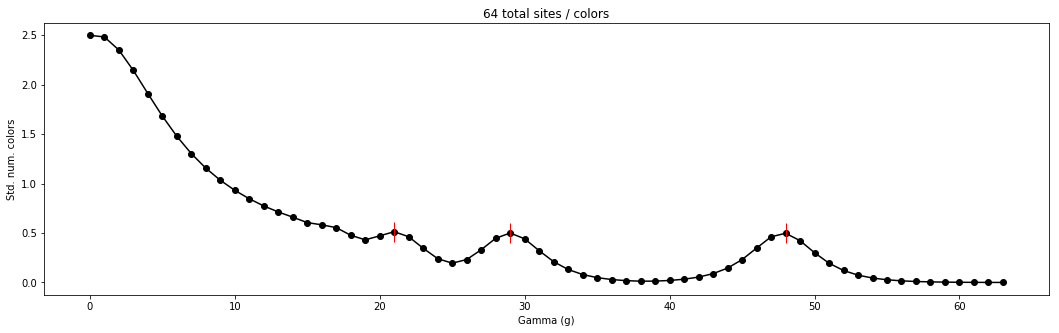

81 [20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]



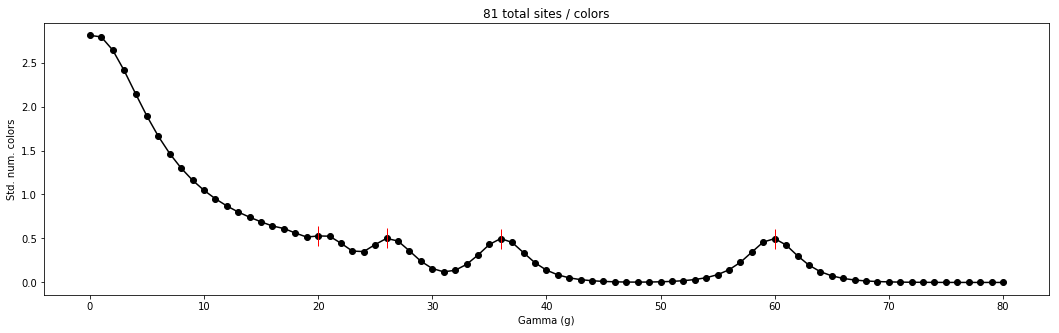

100 [25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]



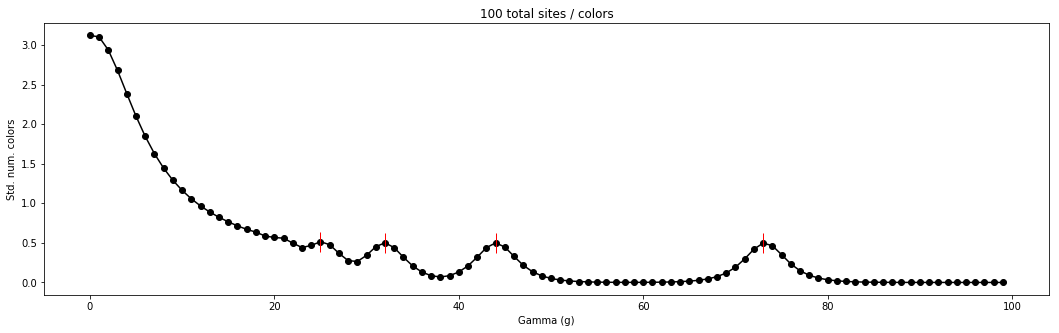

121 [25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



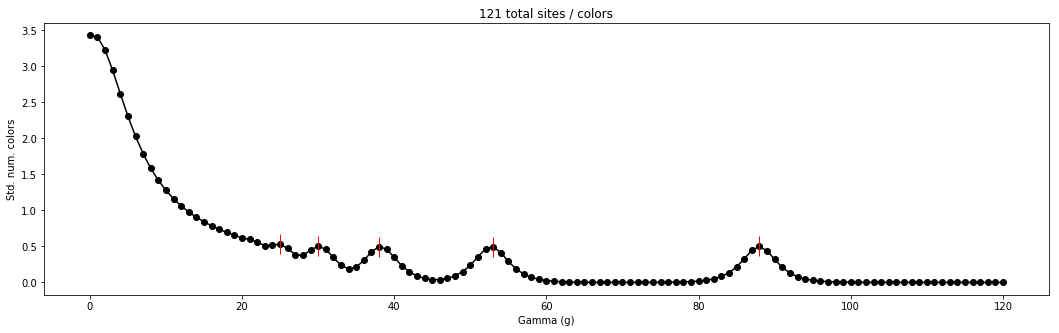

144 [ 25  29  35  45  62 104]
[0.24038462 0.27884615 0.33653846 0.43269231 0.59615385 1.        ]



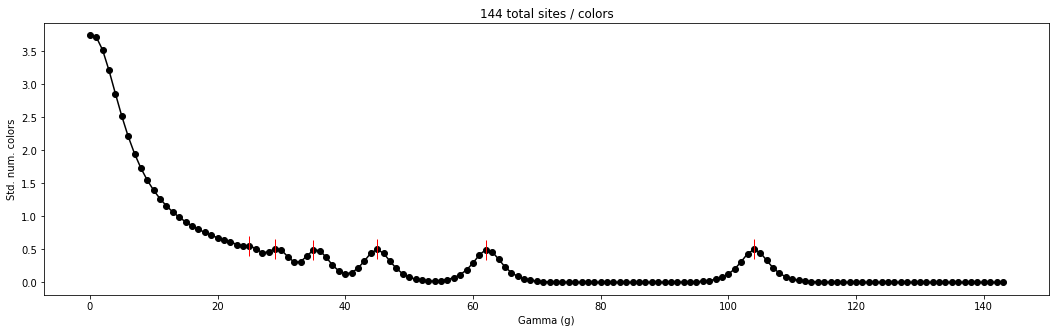

200 [ 30  34  40  48  61  85 143]
[0.20979021 0.23776224 0.27972028 0.33566434 0.42657343 0.59440559
 1.        ]



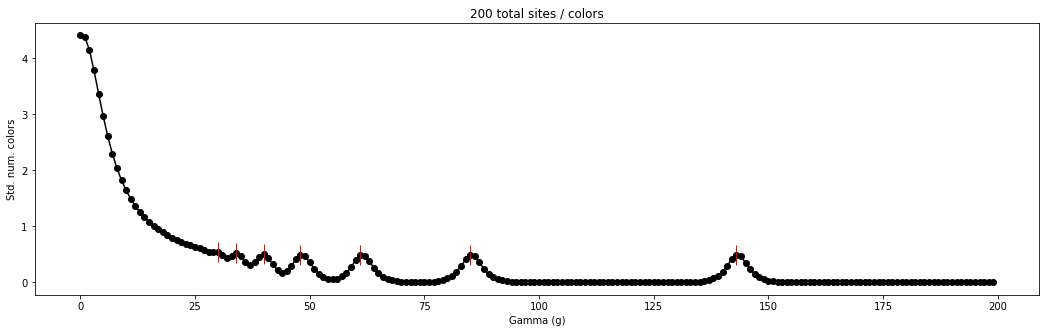

In [216]:
plot_std_colors(16)
plot_std_colors(25)
plot_std_colors(36)
plot_std_colors(49)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plot_std_colors(144)
plot_std_colors(200)
# plt.show()

300 [ 35  39  44  50  59  71  91 126 213]
[0.16431925 0.18309859 0.20657277 0.23474178 0.27699531 0.33333333
 0.42723005 0.5915493  1.        ]



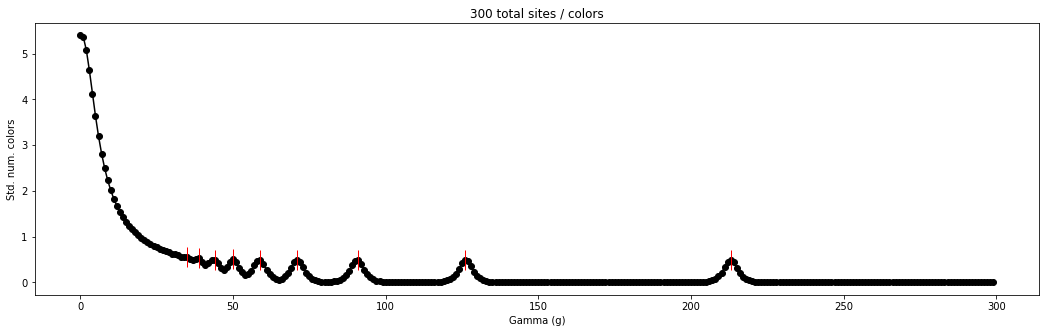

In [217]:
plot_std_colors(300)

500 [ 43  47  51  57  63  71  81  96 116 149 208 352]
[0.12215909 0.13352273 0.14488636 0.16193182 0.17897727 0.20170455
 0.23011364 0.27272727 0.32954545 0.42329545 0.59090909 1.        ]



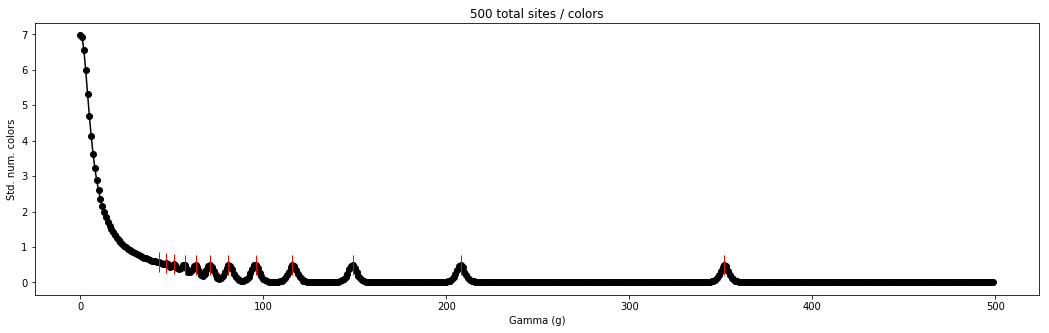

In [218]:
plot_std_colors(500)

600 [ 12  18  24  31  45  48  52  56  61  67  75  84  97 114 139 178 248]
[0.0483871  0.07258065 0.09677419 0.125      0.18145161 0.19354839
 0.20967742 0.22580645 0.24596774 0.27016129 0.30241935 0.33870968
 0.39112903 0.45967742 0.56048387 0.71774194 1.        ]



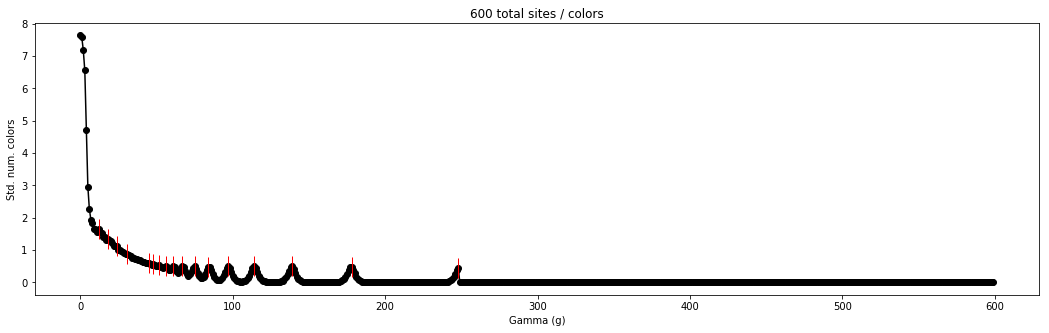

In [219]:
plot_std_colors(600)

600 [ 48  52  56  61  67  75  84  97 114 139 178 249 422]
[0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512
 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739
 1.        ]



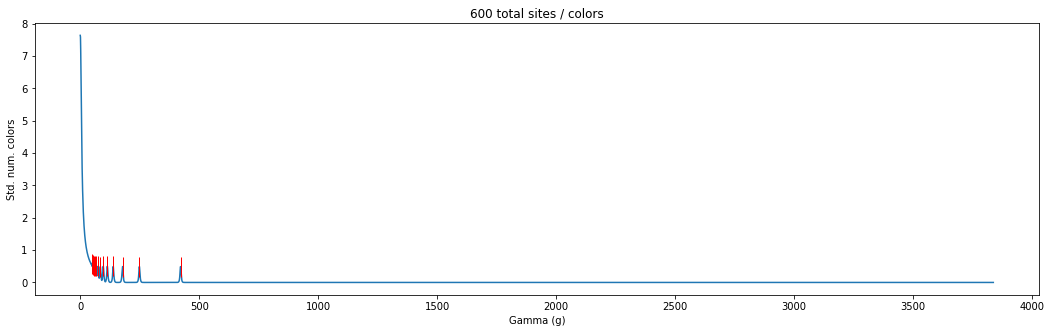

In [236]:
plot_std_colors(600)

600 [ 48  52  56  61  67  75  84  97 114 139 178 249 422]
[0.11374408 0.12322275 0.13270142 0.14454976 0.15876777 0.17772512
 0.19905213 0.22985782 0.27014218 0.32938389 0.42180095 0.59004739
 1.        ]



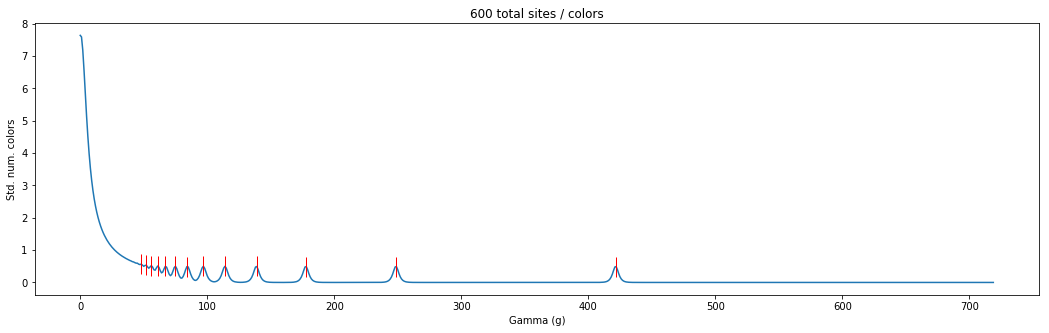

In [240]:
plot_std_colors(600)

700 [ 52  56  60  65  71  78  87  98 113 132 161 207 289 491]
[0.10590631 0.11405295 0.12219959 0.13238289 0.14460285 0.15885947
 0.17718941 0.19959267 0.23014257 0.2688391  0.32790224 0.42158859
 0.5885947  1.        ]



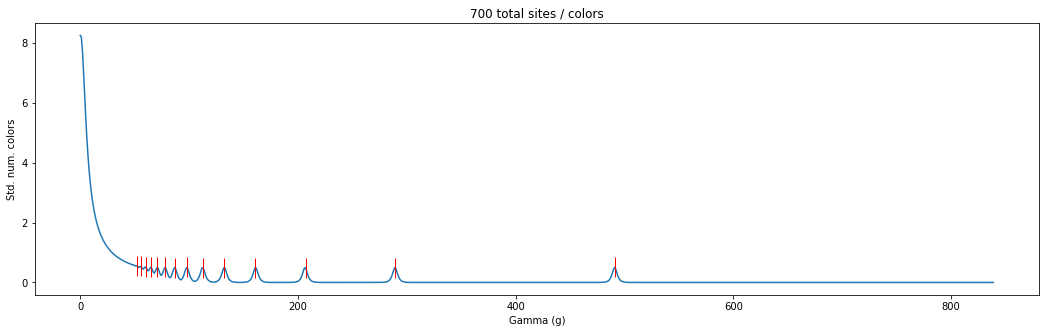

In [239]:
plot_std_colors(700)

800 [ 52  55  59  63  68  74  81  89  99 111 128 151 184 235 330 561]
[0.09269162 0.09803922 0.10516934 0.11229947 0.12121212 0.13190731
 0.14438503 0.15864528 0.17647059 0.19786096 0.22816399 0.26916221
 0.32798574 0.41889483 0.58823529 1.        ]



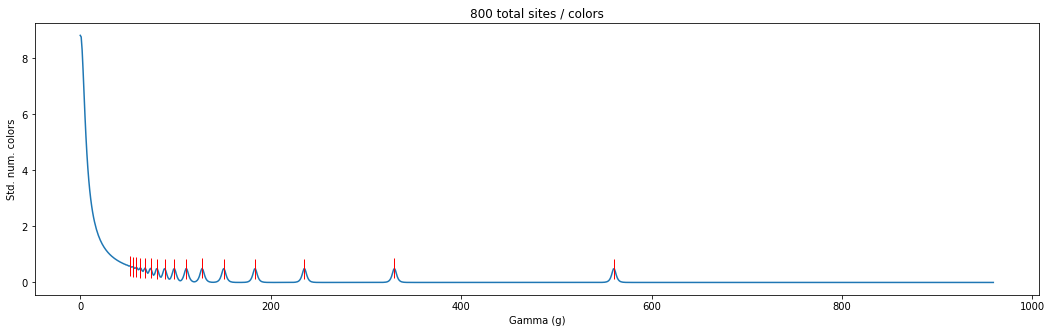

In [241]:
plot_std_colors(800)

900 [ 55  58  62  66  71  76  83  90  99 111 125 144 169 206 264 371 630]
[0.08730159 0.09206349 0.0984127  0.1047619  0.11269841 0.12063492
 0.13174603 0.14285714 0.15714286 0.17619048 0.1984127  0.22857143
 0.26825397 0.32698413 0.41904762 0.58888889 1.        ]



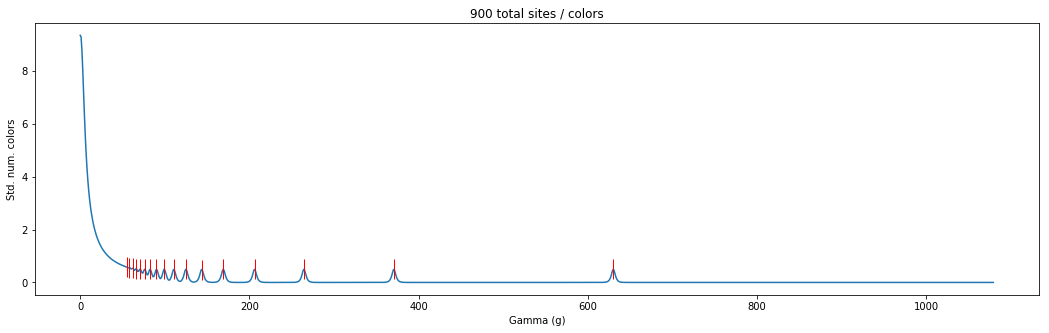

In [242]:
plot_std_colors(900)

1000 [ 58  61  65  69  73  78  84  91 100 110 122 138 159 187 228 293 411 699]
[0.08297568 0.08726753 0.09298999 0.09871245 0.10443491 0.11158798
 0.12017167 0.13018598 0.14306152 0.15736767 0.17453505 0.19742489
 0.22746781 0.26752504 0.32618026 0.41917024 0.58798283 1.        ]



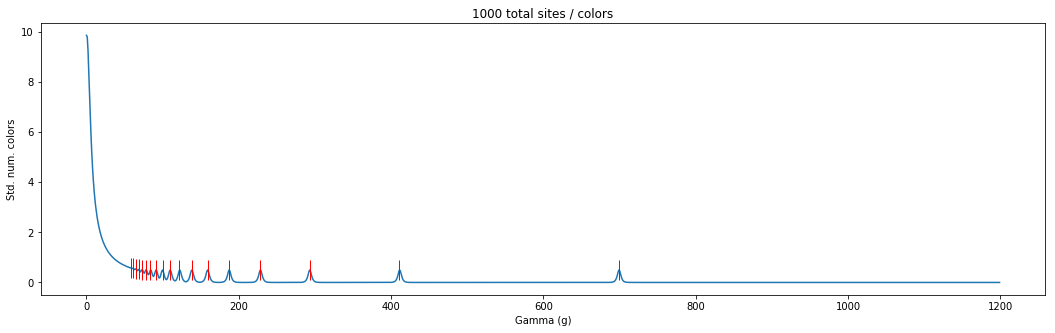

In [249]:
plot_std_colors(1000)

1200 [ 62  65  69  73  77  82  87  93 101 109 119 131 146 165 190 224 273 351
 493 838]
[0.07398568 0.07756563 0.0823389  0.08711217 0.09188544 0.09785203
 0.10381862 0.11097852 0.12052506 0.1300716  0.14200477 0.15632458
 0.17422434 0.19689737 0.22673031 0.2673031  0.32577566 0.41885442
 0.58830549 1.        ]



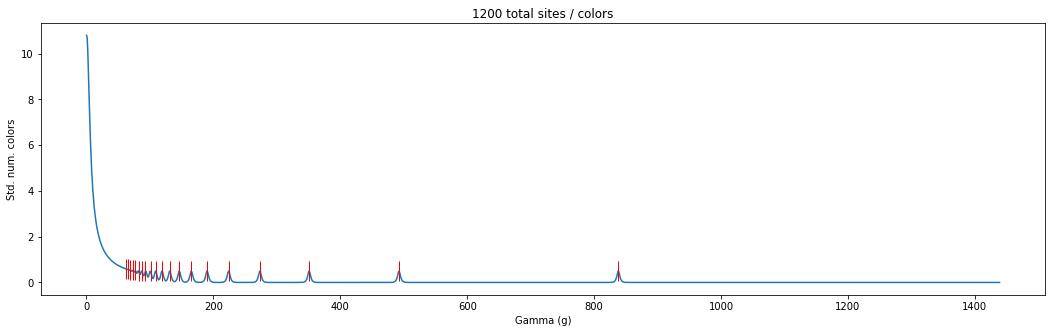

In [250]:
plot_std_colors(1200)

1400 [ 66  69  72  76  80  84  89  95 101 108 117 127 138 152 170 192 221 261
 318 409 574 977]
[0.06755374 0.07062436 0.07369498 0.07778915 0.08188332 0.08597748
 0.09109519 0.09723644 0.10337769 0.11054248 0.11975435 0.12998976
 0.14124872 0.1555783  0.17400205 0.19651996 0.22620266 0.26714432
 0.32548618 0.41862845 0.58751279 1.        ]



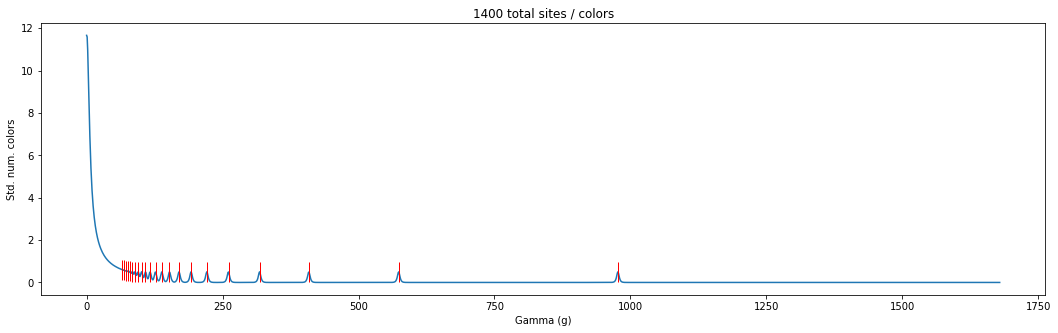

In [251]:
plot_std_colors(1400)

1600 [  72   75   79   82   86   91   96  102  108  115  123  133  144  157
  174  194  219  252  297  363  466  655 1116]
[0.06451613 0.0672043  0.07078853 0.0734767  0.07706093 0.08154122
 0.08602151 0.09139785 0.09677419 0.10304659 0.11021505 0.11917563
 0.12903226 0.140681   0.15591398 0.17383513 0.19623656 0.22580645
 0.26612903 0.32526882 0.41756272 0.58691756 1.        ]



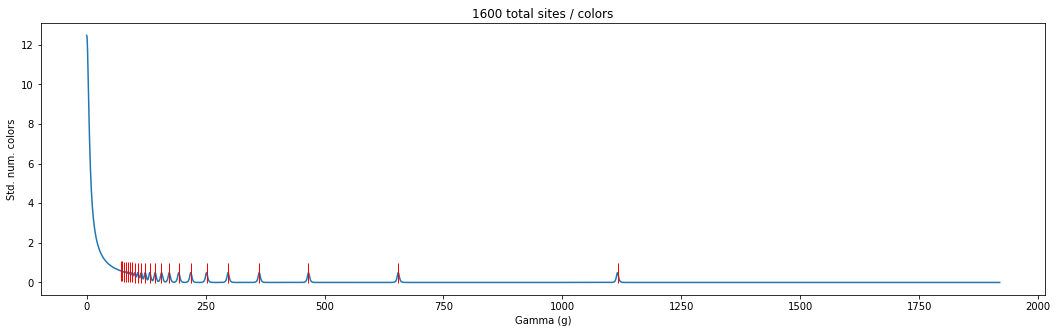

In [252]:
plot_std_colors(1600)

1800 [  77   81   84   88   92   97  102  107  114  121  129  138  149  162
  177  195  217  246  283  334  408  524  736 1254]
[0.06140351 0.0645933  0.06698565 0.07017544 0.07336523 0.07735247
 0.08133971 0.08532695 0.09090909 0.09649123 0.10287081 0.11004785
 0.11881978 0.1291866  0.14114833 0.15550239 0.17304625 0.19617225
 0.22567783 0.26634769 0.32535885 0.41786284 0.58692185 1.        ]



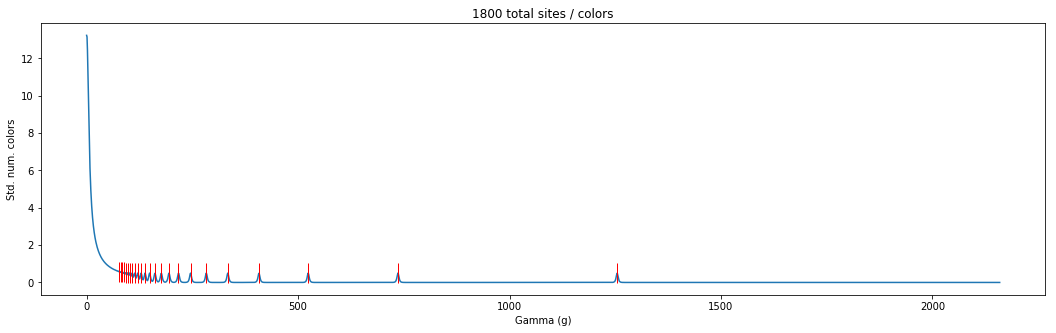

In [253]:
plot_std_colors(1800)

2000 [  77   83   86   89   93   97  102  107  113  119  126  134  143  153
  165  179  196  216  241  273  314  370  452  582  817 1393]
[0.05527638 0.05958363 0.06173726 0.06389088 0.06676238 0.06963388
 0.07322326 0.07681263 0.08111989 0.08542714 0.09045226 0.09619526
 0.10265614 0.10983489 0.11844939 0.12849964 0.14070352 0.15506102
 0.1730079  0.1959799  0.22541278 0.26561378 0.32447954 0.4178033
 0.58650395 1.        ]



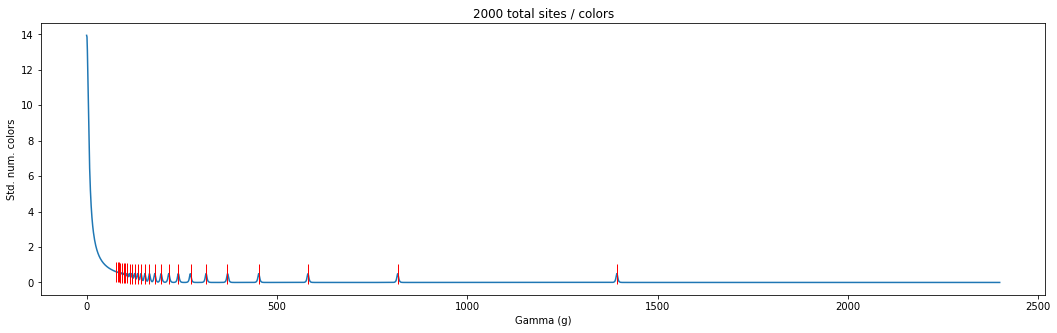

In [254]:
plot_std_colors(2000)

## OLD VERSION

[17 28]
[0.60714286 1.        ]

[21 29 48]
[0.4375     0.60416667 1.        ]

[20 26 36 60]
[0.33333333 0.43333333 0.6        1.        ]

[25 32 44 73]
[0.34246575 0.43835616 0.60273973 1.        ]

[25 30 38 53 88]
[0.28409091 0.34090909 0.43181818 0.60227273 1.        ]



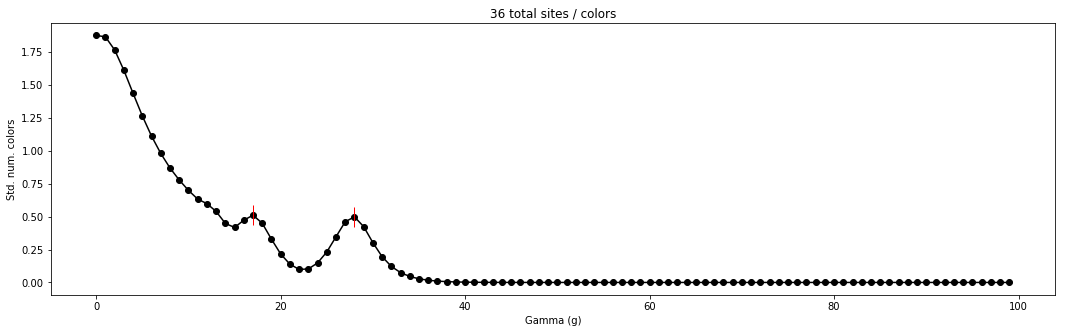

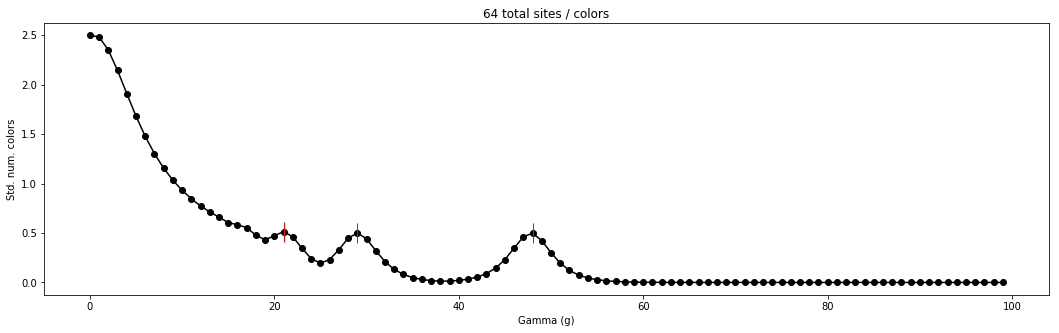

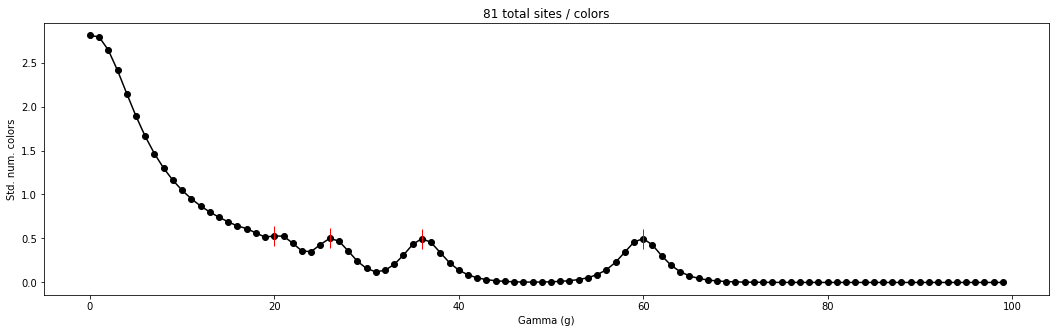

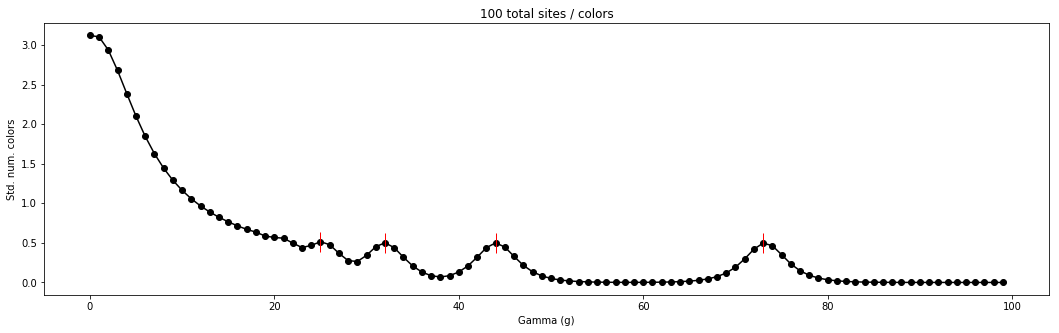

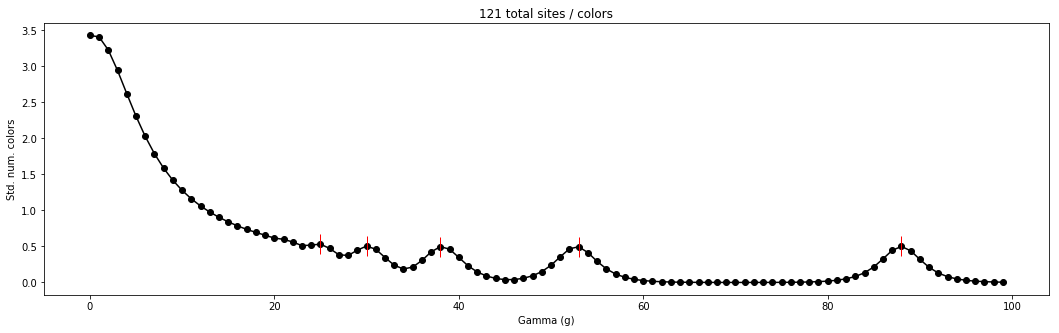

In [68]:
plot_std_colors(36)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


[0.01365924 0.60819554 1.        ]

[0.00794813 0.43965698 0.60594018 1.        ]

[0.00635133 0.34280461 0.43840883 0.60354337 1.        ]

[0.00518984 0.27779295 0.34334881 0.43635619 0.60133843 1.        ]

[0.00431965 0.28157326 0.3421621  0.43412527 0.59952256 1.        ]



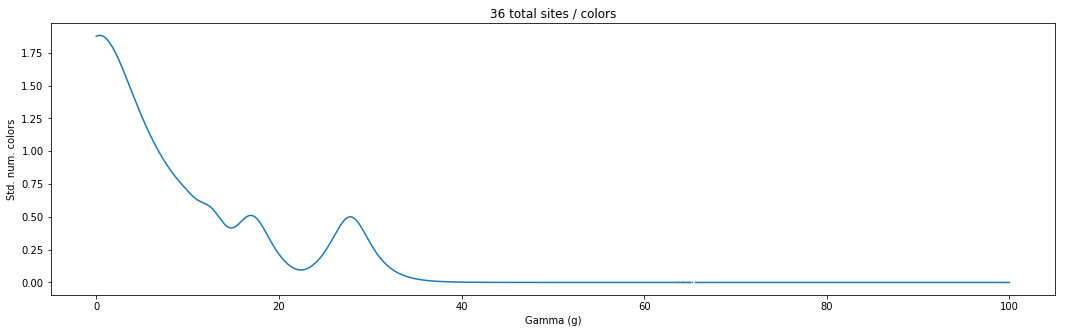

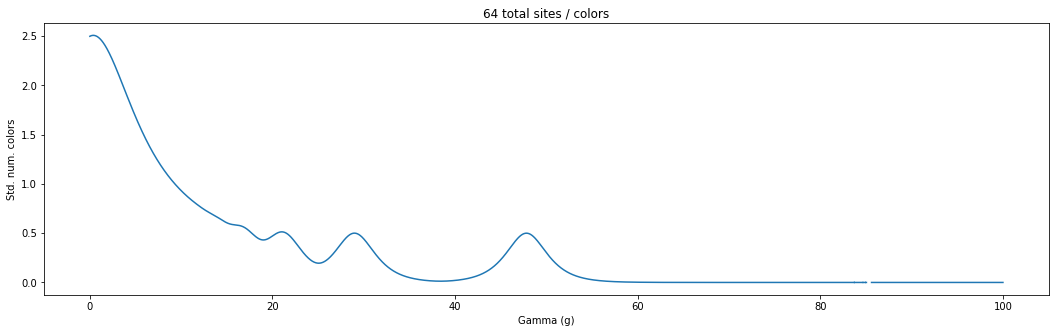

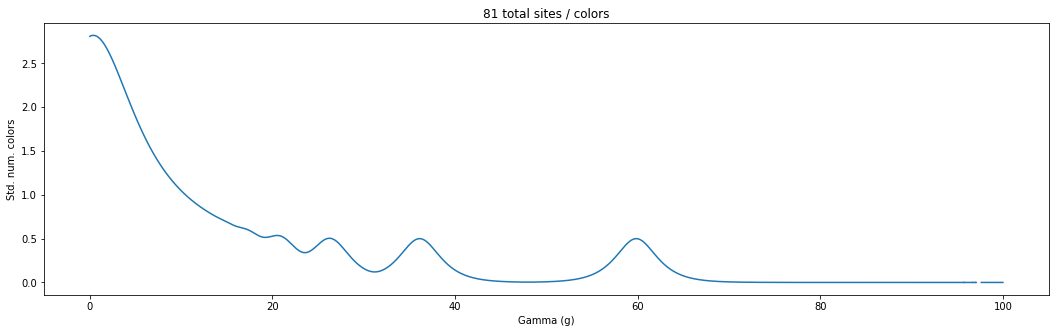

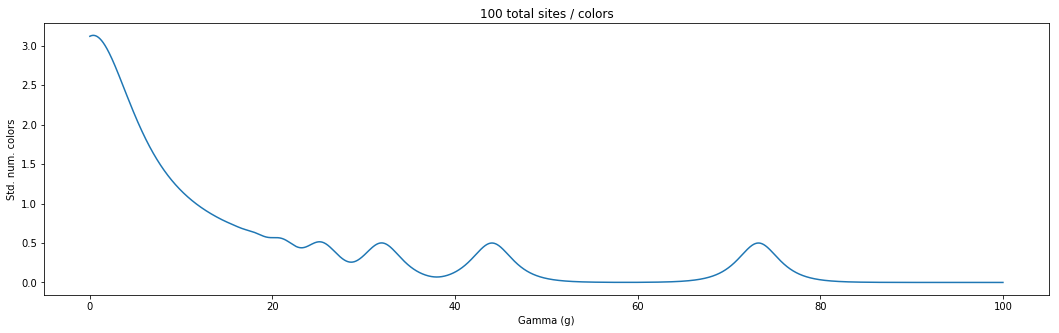

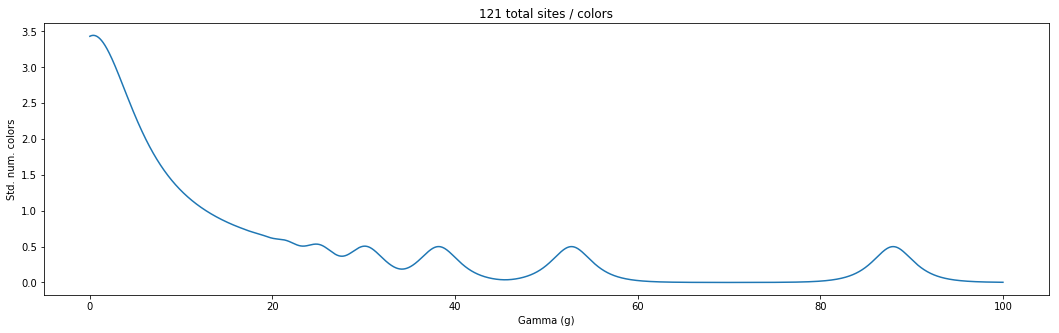

In [50]:
plot_std_colors(36)
plot_std_colors(64)
plot_std_colors(81)
plot_std_colors(100)
plot_std_colors(121)
plt.show()

C:\Users\Oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in double_scalars


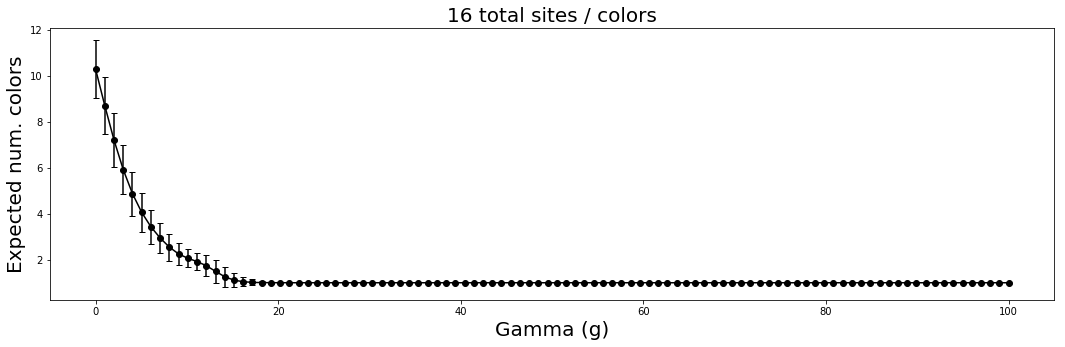

In [9]:
N = 16
# plot_expected_colors(N)
# plot_std_colors(N)
plot_avg_std_colors(N)